In [ ]:
#collect the data through questionaree,interviews,forms,website ie (primary,secondary,tertiary)
#manipulation/changes in data
#EDA
#build a model
#test the model

In [ ]:
#DATA PREPROCESSING

In [2]:
#1-load th libraries
#2-load the dataset
#3-explore the dataset
#4-feature selection ie one selection is related to another feature
#5-handle the missing and manipulate the data
#6-categorical encoding
#7-feature scaling, in that we do not want any column to dominate another column
#8-spliting the data into 70:30 and 80:20
#9-build the model
#10-check the performance of the model

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2
df=pd.read_csv('50_Startups.csv')

In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check whether there is null values or not
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#as there is no missing data in each of the columns
#so there is no need to handle the missing values and manipulate the dataset

In [7]:
#null values are not there
#also there is no missing values
#if there would be missing values in the dataset 
#and there would be 5-7% missing then we drop it
#otherwise we fill it with - fillna()
#in Continuous data-we first check the skewness and then we take the decision to replace it with mean or median
#in Categorical data - we replace it with mode

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#as we have checked the range of our independent features which are R&D,Marketing,Administration we got to know that
#marketing feature has higher range than R&D and Administration, so there is a need to do the Feature Scaling
#so that marketing feature will not dominate in the dataset while preparing the model

In [9]:
df.corr()

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#as we are checking the coorelation of independent feature with the target data in order to check that
#whether independent feature we need to keep in the dataset or not
#it isalso important to check that and independent feature is also showing any correlation with other independent feature or not

In [ ]:
#1=phale jo independent feature ka coorelation hai kya with the target data
#2=fir jo independent feature ka coorelatiion hai kya with the other independent feature

In [ ]:
#bhuv,mukesh,philip,mona(4 independent feature)
#task to prepare a presentation of 8 slides(target)
#each has to prepare 2 slides
#mukesh(2 slides)- i was not able to complete the presentation because philip has not completed it
#Multicollenarity - when one independent feature shows coorelation with the other independent features
#so, it should not exist or it should atleast exist at a minimum level
#so no correlation between independent features or should have small correlation

In [10]:
np.unique(df['State'])

array(['California', 'Florida', 'New York'], dtype=object)

In [ ]:
#pandaspd.get_dummies or 
#sklearn(one hot encoder or label encoder)

In [ ]:
#optional
# i have just used it in order to state the difference between the ordinal and nominal
#df['State'].replace('California',0,inplace=True)
#df['State'].replace('Florida',1,inplace=True)
#df['State'].replace('New York',2,inplace=True)

In [ ]:
#yes you can apply replace function
#but it is not good practice to write one function ie replace again and again
#matlab replace fuction baar baar use karna galat hai

In [ ]:
#nominal or ordinal(rank wala)
#Nominal data- is used for labels
#Ordinal data- is used for defining order of the data
#if in a single column- we have only 2 categories then we can use label encoder
#if in a single column- we have more than 2 categories we will prefer - one hot Encoder/pd.get_dummies()
#and in a single column - we have more than 2 categories -we cannot assign number as 0,1,2,3,4
#because in this case my model wil understand it as ordinal data

In [11]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#seperate the dependent data profit and the independent data

In [12]:
#eisme hamne pure data mai sai ie (:) mai sai -1 last wala column lita hai
Y=df.iloc[:,-1].values

In [13]:
#isme hamne pure data mai sai ie (:) mai sai 0 to 4 liya hai 
X=df.iloc[:,0:4]

In [14]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [15]:
#categorical encoding, eisme column drop nahi huya pada tha but next wale mai haam eak column drop karange
X_new=pd.get_dummies(X)
X_new

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\1054782007.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

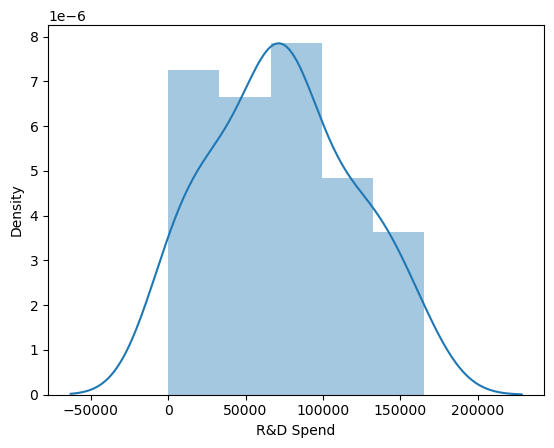

In [17]:
#scaling the data
sns.distplot(X_new['R&D Spend'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\3539512640.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

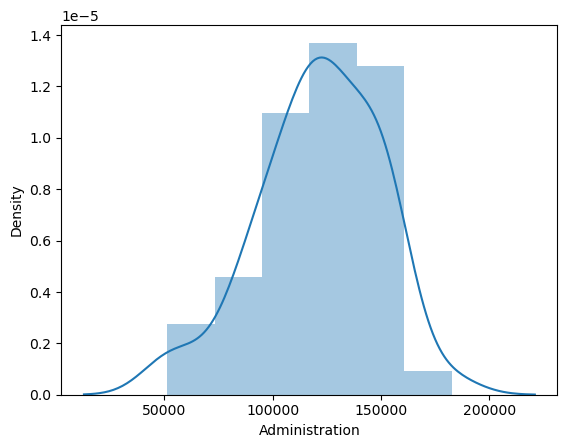

In [19]:
sns.distplot(X_new['Administration'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\687148886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new['Marketing Spend'])


<Axes: xlabel='Marketing Spend', ylabel='Density'>

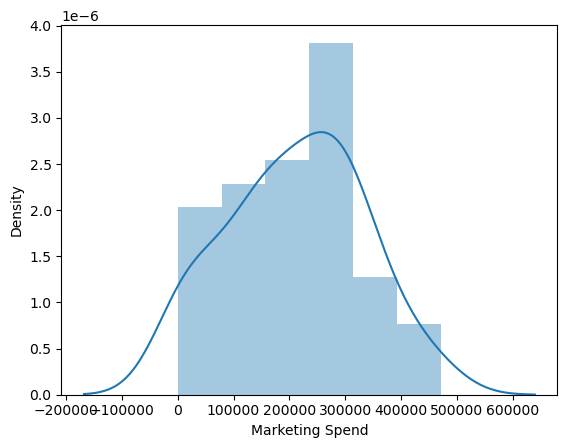

In [20]:
sns.distplot(X_new['Marketing Spend'])

In [ ]:
#as we have checked and seen most of the features are not following standard normal distribution
#so we can apply min max scalar

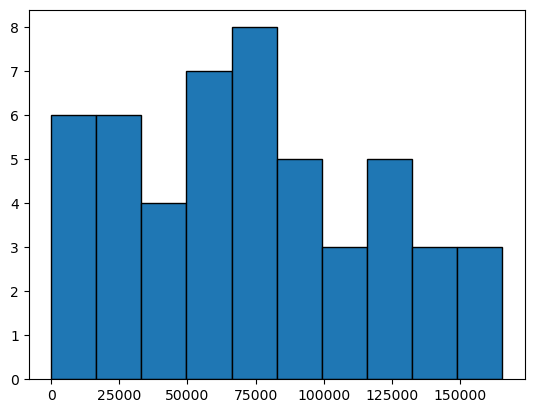

In [21]:
#EDA 
#Uni variate
plt.hist(df['R&D Spend'],edgecolor='Black')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\2499201183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

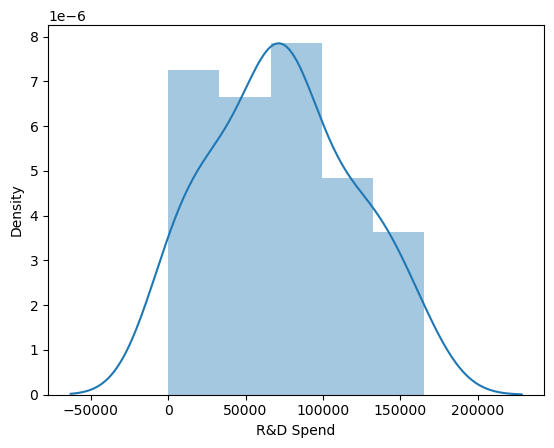

In [22]:
sns.distplot(df['R&D Spend'])

In [23]:
#so we can say that the graph is slightly right skewed data 
df['R&D Spend'].skew()

0.164002172321177

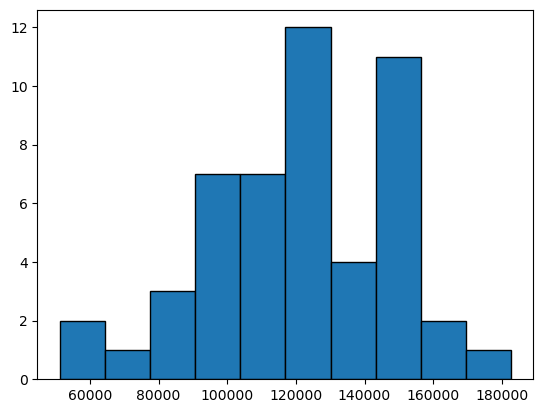

In [24]:
plt.hist(df['Administration'],edgecolor='black')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\3607631006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

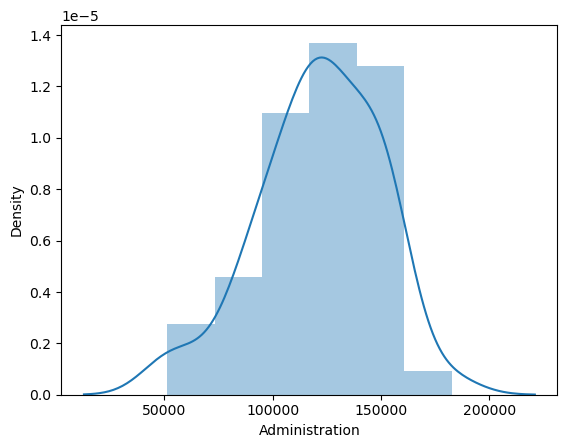

In [25]:
sns.distplot(df['Administration'])

In [26]:
#the graph is ledt skewed data because it is less than zero 
df['Administration'].skew()

-0.4890248099671768

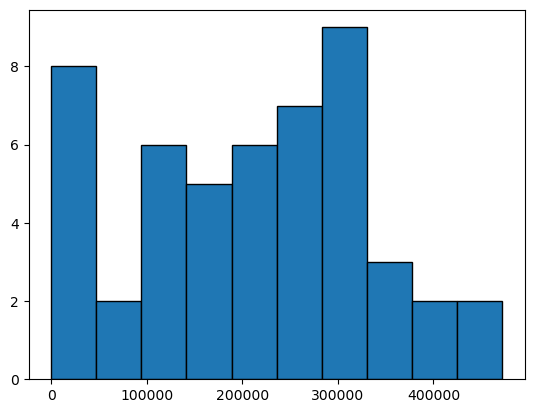

In [28]:
plt.hist(df['Marketing Spend'],edgecolor='black')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\3279449626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Marketing Spend'])


<Axes: xlabel='Marketing Spend', ylabel='Density'>

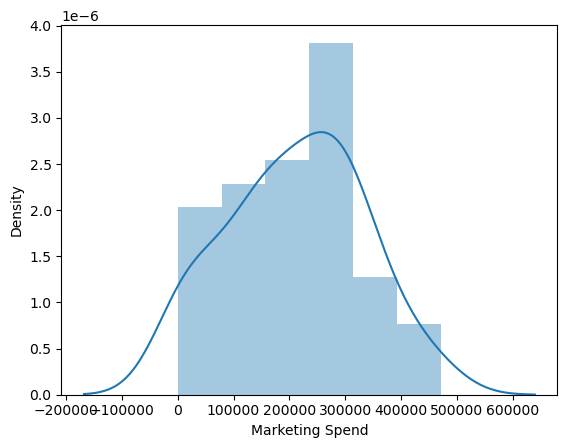

In [30]:
sns.distplot(df['Marketing Spend'])

In [31]:
#the graph is left skewed data because it is less than zero(0)
df['Marketing Spend'].skew()

-0.04647226758360412

In [ ]:
#we will perform min max scalar as none of the column is following standard normal distribution

In [32]:
df.corr()

C:\Users\shiva\AppData\Local\Temp\ipykernel_96424\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#prepare with all feature
#separate the data
#ie target data and features data

In [36]:
X=df.iloc[:,0:4]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [35]:
Y=df.iloc[:,-1]
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [40]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [37]:
#categorical encoding
X_data=pd.get_dummies(X,drop_first=True)
X_data

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [51]:
#feature scaling
#fit transform ki help sai haam convert kar lainge range ko 0 to 1
#eisay haam data ko change nahi kar rahay hai haam bas eak particular range mai laa rahay hai
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
Xnew=mns.fit_transform(X_data)
Xnew

array([[1.        , 0.65174393, 1.        , 0.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        , 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 1.        , 0.        ],
       [0.87313643, 0.51299839, 0.81223513, 0.        , 1.        ],
       [0.85943772, 0.30532804, 0.77613557, 1.        , 0.        ],
       [0.797566  , 0.3694479 , 0.76912588, 0.        , 1.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 1.        , 0.        ],
       [0.72901786, 0.74173276, 0.66049977, 0.        , 1.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 0.        ],
       [0.61635061, 0.45150637, 0.48573267, 1.        , 0.        ],
       [0.60884455, 0.30836422, 0.52936195, 0.        , 0.        ],
       [0.56766982, 0.57883556, 0.52956308, 1.        , 0.        ],
       [0.55635219, 0.64106561, 0.53555202, 0.        , 0.        ],
       [0.72539353, 0.8013272 , 0.

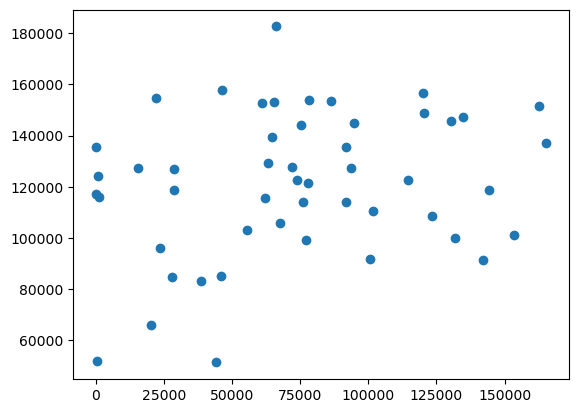

In [52]:
plt.scatter(df['R&D Spend'],df['Administration'])
plt.show()

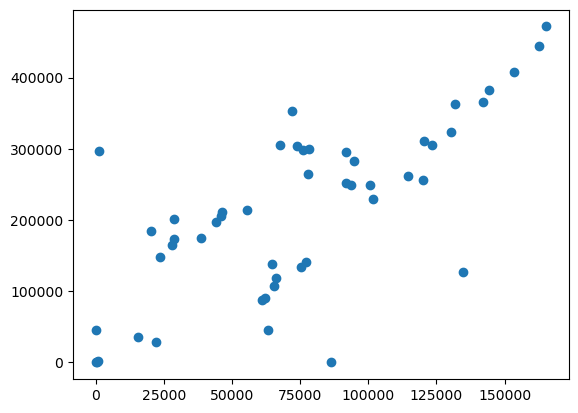

In [54]:
plt.scatter(df['R&D Spend'],df['Marketing Spend'])
plt.show()

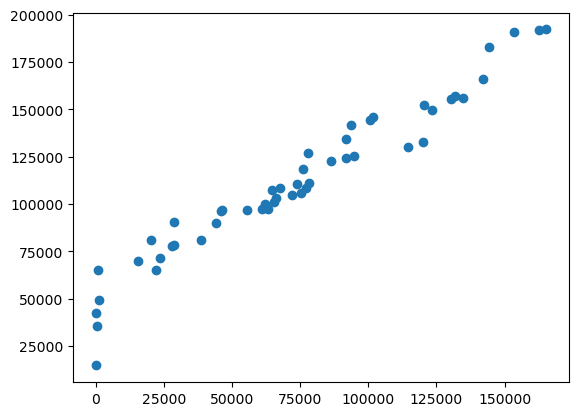

In [56]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.show()

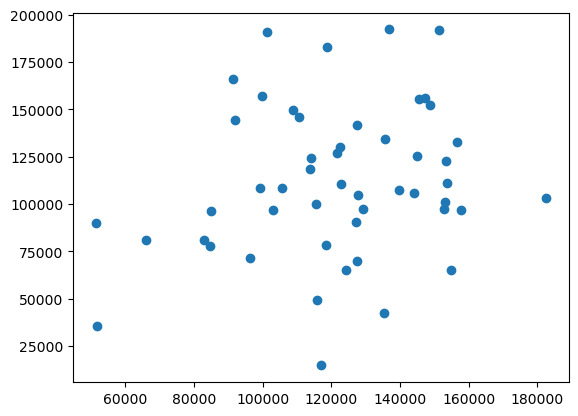

In [57]:
plt.scatter(df['Administration'],df['Profit'])
plt.show()

In [ ]:
#now splitting the data into train and testing part

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Xnew,Y,test_size=0.3)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35, 5)
(15, 5)
(35,)
(15,)


In [61]:
from sklearn.linear_model import LinearRegression 

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(X_train,Y_train)

LinearRegression()

In [66]:
#accuracy score
lr.score(X_train,Y_train)

0.9396449896498905

In [69]:
#prediction
Y_predict=lr.predict(X_test)
Y_predict

array([ 56169.96441474, 101891.7373493 ,  72620.74369488,  84060.10065217,
       176738.5891584 ,  70179.4880391 , 103412.23738388, 166255.49158558,
       151212.02865115,  99868.72417605,  44334.14231315,  93835.78176874,
        56072.45110031, 112370.4248147 , 116020.57076673])

In [68]:
Y_test

46     49490.75
29    101004.64
40     78239.91
34     96712.80
4     166187.94
42     71498.49
30     99937.59
5     156991.12
8     152211.77
25    107404.34
47     42559.73
35     96479.51
48     35673.41
26    105733.54
22    110352.25
Name: Profit, dtype: float64

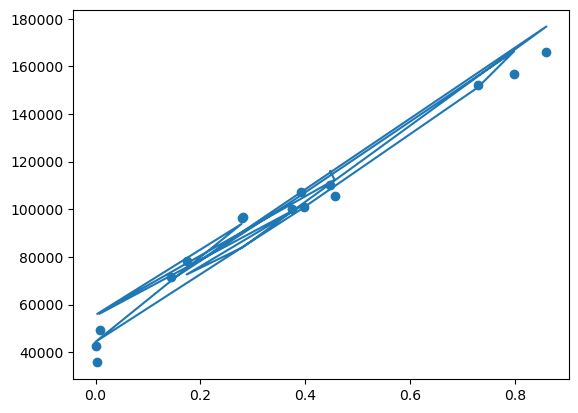

In [71]:
plt.scatter(X_test[:,0],Y_test)
plt.plot(X_test[:,0],Y_predict)

In [72]:
#we are finding the accuracy of the model
#R2 which is the cofficient of determination
lr.score(X_test,Y_test)

0.9537294491009176

In [74]:
#overfitted or not
#we are checking the performance of model with cross validation
#in order to validate the performance of the model 
#as we got 93% on training and 95% accuracy on testing dataset so our model is performing well
#in case there is a huge difference in training and testing accuracy then we can say that our model is overfitted

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=5)

array([0.95103978, 0.89169363, 0.91554628, 0.90878365, 0.90484101])

In [77]:
cross_val_score(lr,X_test,X_test,cv=5)

array([1. , 0.8, 1. , 0.8, 1. ])